# K-means Clustering

### Importing Resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Displaying the Image

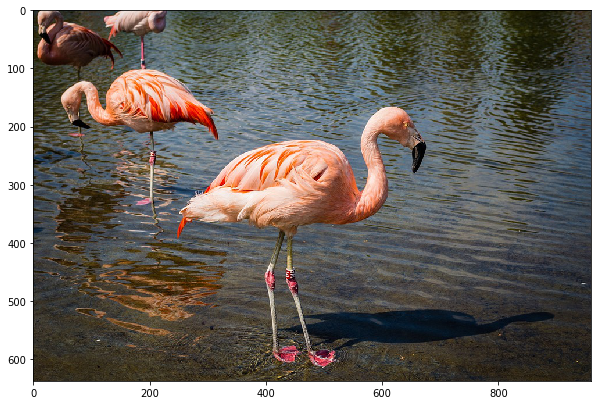

In [2]:
# Reading the image
image = cv2.imread('images/flamingos.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image);

### Preparing data for K-Means

In [3]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implementing K-Means Clustering

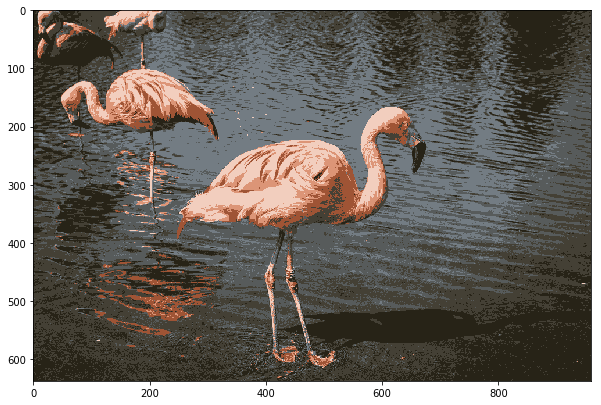

In [4]:
# Defining the stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Performing k-means clustering
k = 7
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Converting data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshaping data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.figure(figsize=(10,8))
plt.imshow(segmented_image);

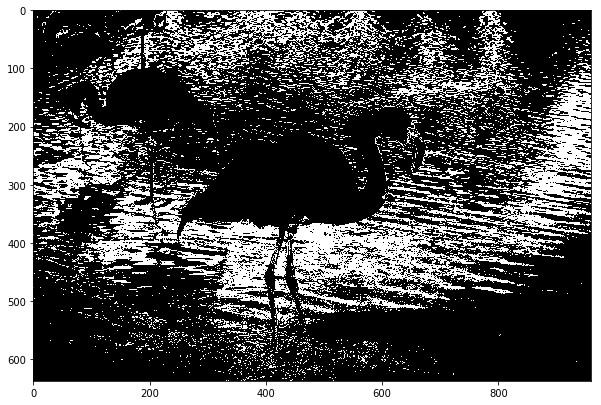

In [5]:
# Visualizing individual segments
plt.figure(figsize=(10,8))
plt.imshow(labels_reshape==1, cmap='gray');

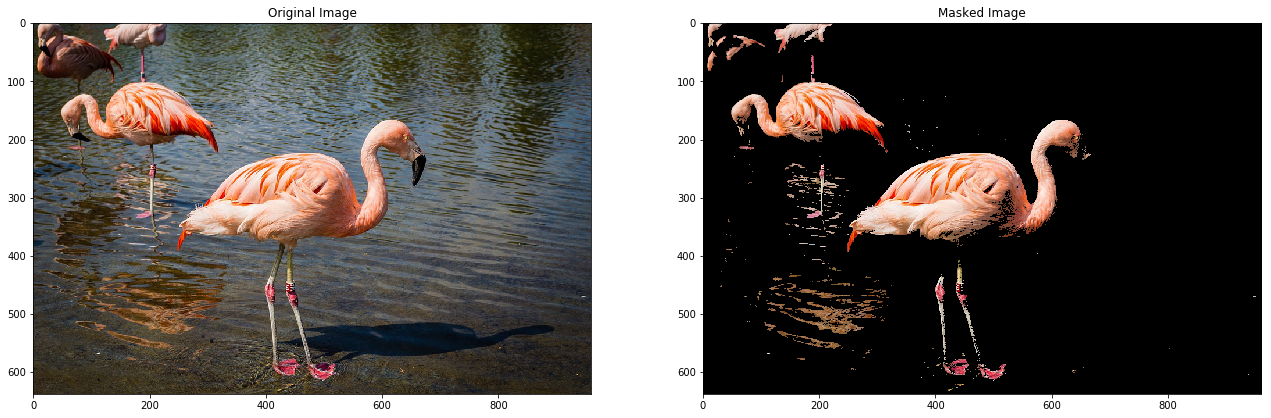

In [6]:
# Masking the image segment
masked_image = np.copy(image)
masked_image[labels_reshape == 1] = [0, 0, 0]
masked_image[labels_reshape == 2] = [0, 0, 0]
masked_image[labels_reshape == 3] = [0, 0, 0]
masked_image[labels_reshape == 5] = [0, 0, 0]

fig, [ax0, ax1] = plt.subplots(1,2, figsize = (22,8))
ax0.set_title("Original Image")
ax0.imshow(image);
ax1.set_title("Masked Image")
ax1.imshow(masked_image);